<a href="https://colab.research.google.com/github/gdsghost/IN4720---Geographic-Information-Systems/blob/main/GIS_Group_Assignment_184194C_Yasodya_G_D_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crimes in Sri Lanka Analysis**

**2. Homicide**

Crime is present in various forms in Sri Lanka. Crime is segmented into two broad classifications: grave crimes (those which are indictable) and minor crimes (those which are not). Exceptions can be made for criminal liability on the grounds of duress, insanity, intoxication, necessity, and private defense. Punishment for crime includes several options: community service, fine, forfeiture of property, imprisonment, institutional treatment, probation, suspended sentence, and death; while the death penalty is available in the country, there have been no executions since 1976. Corporal punishments (whipping) has been abolished as of 2005.

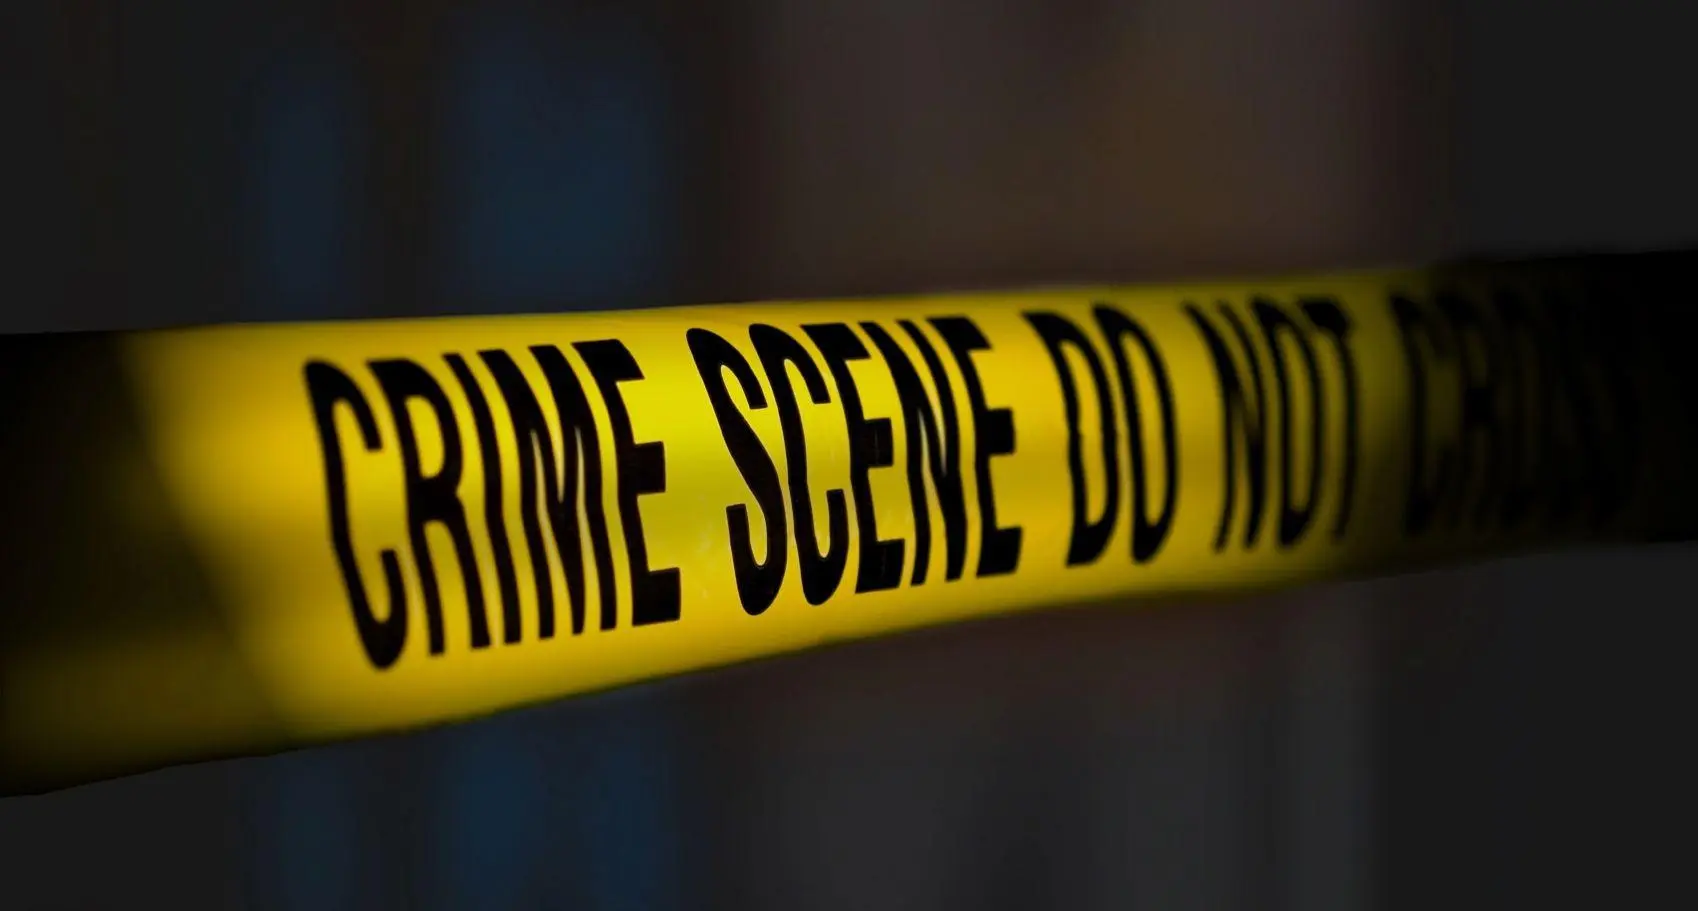

**GeoPandas** is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 11.8 MB/s 
     |████████████████████████████████| 6.3 MB 49.3 MB/s 
     |████████████████████████████████| 16.7 MB 623 kB/s 


The only real barrier to plotting maps of Sri Lanka with Python libraries GeoPandas and MatPlotLib is the difficulty of accessing geographical data for Sri Lanka. Nuwan I. Senaratna have attempted to solve this problem by scraping geographical data from various sources, sharing it on GitHub, and providing a simple python library ***geo-nuuuwan*** for conveniently accessing this data.

In [ ]:
!pip install geo-nuuuwan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 27.5 MB/s 
     |████████████████████████████████| 2.2 MB 47.4 MB/s 
     |████████████████████████████████| 5.2 MB 14.1 MB/s 
     |████████████████████████████████| 140 kB 56.1 MB/s 
     |████████████████████████████████| 384 kB 58.1 MB/s 
     |████████████████████████████████| 139 kB 70.1 MB/s 
     |████████████████████████████████| 139 kB 71.1 MB/s 
     |████████████████████████████████| 138 kB 64.6 MB/s 
     |████████████████████████████████| 138 kB 73.3 MB/s 
     |████████████████████████████████| 138 kB 71.7 MB/s 
     |████████████████████████████████| 138 kB 57.8 MB/s 
     |████████████████████████████████| 138 kB 60.1 MB/s 
     |████████████████████████████████| 153 kB 59.9 MB/s 
     |████████████████████████████████| 137 kB 60.5 MB/s 
     |████████████████████████████████| 136 kB 60.0 MB/s 
     |█████████████████████████

Importing installed modules


1.   pandas - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.
2.   matplotlib.pyplot - It is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.





In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geo import geodata

**Reading Data**

Dataset (Crime Data of Sri Lanka -2010) used for this study is downloaded from [Open Data Portal - Sri Lanka](https://data.gov.lk)

In [ ]:
from google.colab import files
data_load = files.upload()

Saving Crime_data_2010.csv to Crime_data_2010.csv


Read the csv file containing crime data in district vise and load to a dataframe. Then I sorted the data in accending order of the District name for analysis.

In [ ]:
crime_data_2010 = pd.DataFrame(pd.read_csv('Crime_data_2010.csv'))
crime_data_2010_sorted = crime_data_2010.sort_values(by=['District'])
crime_data_2010_sorted

,District,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,...,Extortion,"Cheating/Misappropriation C.B. Trust over Rs.100,000/=",Theft of Property including praedial produce over Rs. 5000/ & cycle cattle theft irrrespective of their value,Counterfeiting Currency,Offences against State,Cruelty to Children & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possession of Automatic or Repeater Shot Guns,"Offences under the Poisons, Opium & Dangerous Drugs"
0,Ampara,16,41,37,241,98,73,19,7,47,...,0,42,187,0,1,2,2,13,1,6
1,Anuradhapura,51,21,92,720,135,69,33,13,117,...,1,43,425,3,0,27,0,10,0,4
2,Badulla,26,18,27,402,68,86,19,16,54,...,0,3,164,0,0,6,0,2,0,3
3,Batticaloa,21,30,45,237,39,69,9,5,40,...,5,10,269,1,4,10,1,16,2,0
4,Colombo,108,30,164,3649,149,345,76,17,87,...,21,281,3287,12,2,33,4,38,5,326
5,Galle,60,36,65,867,83,146,48,22,128,...,1,334,472,2,0,25,1,23,3,55
6,Gampaha,96,55,146,3664,143,382,83,17,159,...,17,68,2106,5,0,59,2,23,1,75
7,Hambantota,43,38,44,362,33,87,43,10,77,...,1,51,252,0,0,4,1,4,1,35
8,Jaffna,31,6,24,191,46,80,28,3,39,...,2,14,324,1,0,6,0,5,1,1
9,Kalutara,66,33,54,1241,46,149,47,13,90,...,0,74,767,0,0,32,0,12,2,60


Get the district geocordinates of each district using the geo-nuuuwan library and select only "name" , "population" and "geometry" coloumns for processing

In [ ]:
district_geo = geodata.get_region_geodata('LK','district')
district_geo_processed = district_geo[['name', 'population','geometry']].sort_values(by=['name'])
district_geo_processed

,name,population,geometry
13,Ampara,649402,"MULTIPOLYGON (((81.72902 6.54980, 81.72879 6.5..."
16,Anuradhapura,860575,"MULTIPOLYGON (((80.54128 7.83628, 80.53963 7.8..."
4,Badulla,815405,"MULTIPOLYGON (((80.92313 6.68965, 80.92030 6.6..."
18,Batticaloa,526567,"MULTIPOLYGON (((81.79691 7.43905, 81.79596 7.4..."
19,Colombo,2323964,"MULTIPOLYGON (((79.89944 6.72178, 79.89896 6.7..."
20,Galle,1063334,"MULTIPOLYGON (((80.37651 5.96571, 80.37510 5.9..."
9,Gampaha,2304833,"MULTIPOLYGON (((80.06231 6.90864, 80.06090 6.9..."
15,Hambantota,599903,"MULTIPOLYGON (((80.73809 5.98217, 80.73786 5.9..."
22,Jaffna,583882,"MULTIPOLYGON (((79.52984 9.38954, 79.53078 9.3..."
11,Kalutara,1221948,"MULTIPOLYGON (((80.29661 6.35119, 80.29897 6.3..."


Merge the 2 dataframes based on the district names. I used `pandas.DataFrame.merge` function to database-style join. Such that output dataframe contains both crime data and respective geo coordinates of the districts. Then I dopped the "name" column since its dublicate to the "District" coloumn and filterout 'District',' Homicide/Abet. To commit suicide', 'population' and 'geometry' columns for our study.

In [ ]:
crime_data_2010_sorted_with_geo = crime_data_2010_sorted.merge(district_geo_processed, left_on='District', right_on='name')
crime_data_2010_sorted_with_geo_processed = crime_data_2010_sorted_with_geo.drop(['name'], axis=1)[['District',' Homicide/Abet. To commit suicide','population','geometry']]
crime_data_2010_sorted_with_geo_processed

,District,Homicide/Abet. To commit suicide,population,geometry
0,Ampara,19,649402,"MULTIPOLYGON (((81.72902 6.54980, 81.72879 6.5..."
1,Anuradhapura,33,860575,"MULTIPOLYGON (((80.54128 7.83628, 80.53963 7.8..."
2,Badulla,19,815405,"MULTIPOLYGON (((80.92313 6.68965, 80.92030 6.6..."
3,Batticaloa,9,526567,"MULTIPOLYGON (((81.79691 7.43905, 81.79596 7.4..."
4,Colombo,76,2323964,"MULTIPOLYGON (((79.89944 6.72178, 79.89896 6.7..."
5,Galle,48,1063334,"MULTIPOLYGON (((80.37651 5.96571, 80.37510 5.9..."
6,Gampaha,83,2304833,"MULTIPOLYGON (((80.06231 6.90864, 80.06090 6.9..."
7,Hambantota,43,599903,"MULTIPOLYGON (((80.73809 5.98217, 80.73786 5.9..."
8,Jaffna,28,583882,"MULTIPOLYGON (((79.52984 9.38954, 79.53078 9.3..."
9,Kalutara,47,1221948,"MULTIPOLYGON (((80.29661 6.35119, 80.29897 6.3..."


Then I convered pandas Dataframe to GeoPandas Dataframe for plotting on the Sri Lankan map. The parameter `crs = "EPSG:4326"` denotes Coordinate Reference System of the geometry objects.  `EPSG:4326` is same as `WGS 84`,which is latitude/longitude coordinate system based on the Earth's center of mass, used by the Global Positioning System among others

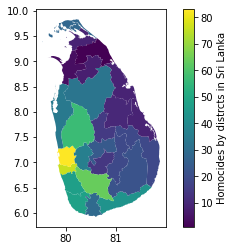

In [ ]:
crime_data_2010_sorted_with_geo_mapping = gpd.GeoDataFrame(crime_data_2010_sorted_with_geo_processed, crs = "EPSG:4326")
crime_data_2010_sorted_with_geo_mapping.plot(column = ' Homicide/Abet. To commit suicide', legend = True, legend_kwds = {'label': "Homocides by distrcts in Sri Lanka", 'orientation': "vertical"});

Let's see the homocide ratio based on the population on each district

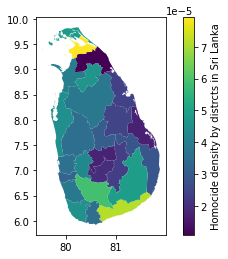

In [ ]:
crime_data_2010_sorted_with_geo_mapping['homocide_density'] = crime_data_2010_sorted_with_geo_mapping[' Homicide/Abet. To commit suicide'] / crime_data_2010_sorted_with_geo_mapping['population']
crime_data_2010_sorted_with_geo_mapping.plot(column = 'homocide_density', legend = True, legend_kwds = {'label': "Homocide density by distrcts in Sri Lanka", 'orientation': "vertical"});

**Gampaha District**

However let's analyse Gampaha district for more infomration about the homocides 

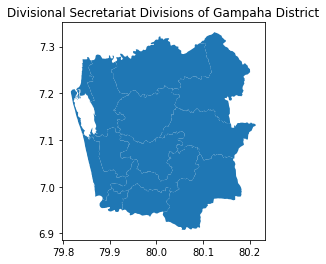

In [ ]:
gamp = geodata.get_region_geodata('LK-12','dsd')
gamp.plot();
plt.title('Divisional Secretariat Divisions of Gampaha District');

I have added dummy data about homocides for 13 Divisional Secretariat Divisions of Gampaha District for further analysis since there was no data available online

In [ ]:
gampaha_homocides = geodata.get_region_geodata('LK-12','dsd')
dummy_homocides = [1,17,12,10,4,2,5,0,0,7,5,11,9]
gampaha_homocides['homocides'] = dummy_homocides
gampaha_homocides

,id,name,country_id,province_id,district_id,dsd_id,ed_id,area,population,hasc,centroid_altitude,geometry,homocides
19,LK-1212,Mirigama,LK,LK-1,LK-12,LK-1212,EC-02,183.0,164580,LK.GQ.MR,105,"MULTIPOLYGON (((80.08140 7.16170, 80.08070 7.1...",1
23,LK-1224,Gampaha,LK,LK-1,LK-12,LK-1224,EC-02,96.0,197667,LK.GQ.GA,25,"MULTIPOLYGON (((80.01258 7.01401, 80.01022 7.0...",17
44,LK-1209,Divulapitiya,LK,LK-1,LK-12,LK-1209,EC-02,202.0,144506,LK.GQ.DI,26,"MULTIPOLYGON (((80.02837 7.21067, 80.02578 7.2...",12
52,LK-1233,Mahara,LK,LK-1,LK-12,LK-1233,EC-02,94.0,207782,LK.GQ.MA,39,"MULTIPOLYGON (((79.91759 6.98738, 79.91735 6.9...",10
97,LK-1218,Wattala,LK,LK-1,LK-12,LK-1218,EC-02,54.0,175525,LK.GQ.WA,1,"MULTIPOLYGON (((79.89095 6.97014, 79.89095 6.9...",4
120,LK-1215,Minuwangoda,LK,LK-1,LK-12,LK-1215,EC-02,128.0,178331,LK.GQ.MN,9,"MULTIPOLYGON (((79.96143 7.09628, 79.96072 7.0...",2
126,LK-1203,Negombo,LK,LK-1,LK-12,LK-1203,EC-02,50.0,142136,LK.GQ.NE,10,"MULTIPOLYGON (((79.83933 7.12958, 79.84027 7.1...",5
134,LK-1239,Biyagama,LK,LK-1,LK-12,LK-1239,EC-02,59.0,186585,LK.GQ.BI,33,"MULTIPOLYGON (((79.95318 6.94311, 79.94988 6.9...",0
178,LK-1236,Kelaniya,LK,LK-1,LK-12,LK-1236,EC-02,20.0,137339,LK.GQ.KE,6,"MULTIPOLYGON (((79.90556 6.94781, 79.90462 6.9...",0
231,LK-1221,Ja-Ela,LK,LK-1,LK-12,LK-1221,EC-02,60.0,201521,LK.GQ.JE,15,"MULTIPOLYGON (((79.93880 7.02263, 79.93880 7.0...",7


Then I plotted the distribution of homocides in the gampaha district

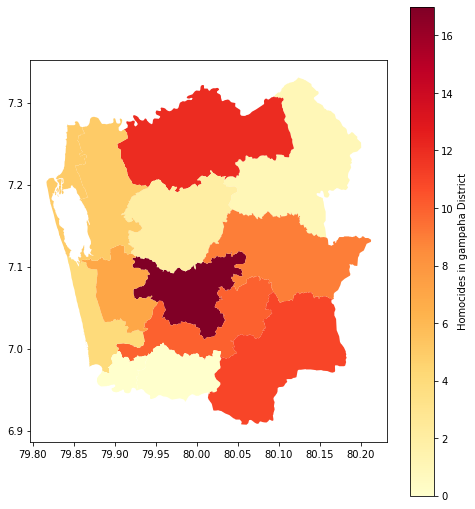

In [ ]:
gampaha_homocides.plot(column = 'homocides', legend = True, legend_kwds = {'label': "Homocides in gampaha District", 'orientation': "vertical"}, cmap='YlOrRd',
    figsize=(8, 9));

**Heat Map**

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space

I will be using folium to drow heat map. Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

I will be creating dummy locations where homocides were happen in the Minuwangoda city.

In [ ]:
lst = [[7.169445, 79.947854, 2], [7.169605, 79.947087, 1],
       [7.168695, 79.948455, 5], [7.171441, 79.945494, 3],
       [7.167442302232142, 79.94100551050232, 1],
        [7.165340857709158, 79.9440931411421, 3],
        [7.166885304200616, 79.93881099012832, 1],
        [7.167492942698839, 79.93888754289664, 1],
        [7.166480044617653, 79.95139141437589, 1],
        [7.175296635889956, 79.93268101682713, 1],
        [7.175424079234568, 79.96306725744674, 2],
        [7.170143963610334, 79.95967600188624, 5],
        [7.176786955663236, 79.94379643505405, 1],
        [7.176744375891356, 79.9434960140759, 2],
        [7.17610538072769, 79.96444088213167, 1],
        [7.17678675505517, 79.96225184667286, 2],
        [7.17661648841523, 79.95817423235648, 5],
        [7.16933485526796, 79.96092066471688, 2],
        [7.176190754384809, 79.95156454078564, 1],
        [7.176190743926926, 79.95246583724614, 2]]
minu_homo = pd.DataFrame(lst, columns =['lat', 'lon','count'])
m = folium.Map([7.169164950111367, 79.94783040512218], zoom_start=15)
minu_homo

,lat,lon,count
0,7.169445,79.947854,2
1,7.169605,79.947087,1
2,7.168695,79.948455,5
3,7.171441,79.945494,3
4,7.167442,79.941006,1
5,7.165341,79.944093,3
6,7.166885,79.938811,1
7,7.167493,79.938888,1
8,7.166480,79.951391,1
9,7.175297,79.932681,1


Then I will draw the heatmap on the folium map as another layer to show how homocides were clustered or varies over space

In [ ]:
HeatMap(minu_homo, 
        min_opacity=0.4,
        blur = 18
               ).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)
m